- Classify dog and cats images using an Artificial Neuron

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from sklearn.metrics import accuracy_score
from tqdm import tqdm

- Load Cat/Dog DataSet

In [3]:
X_tr, y_tr, X_tst, y_tst = load_data()

In [4]:
print('X_tr is a {} matrix'.format(X_tr.shape))
print('y_tr is a {} vector'.format(y_tr.shape))
print(np.unique(y_tr, return_counts=True))

X_tr is a (1000, 64, 64) matrix
y_tr is a (1000, 1) vector
(array([0., 1.]), array([500, 500], dtype=int64))


In [5]:
print('X_tst is a {} matrix'.format(X_tst.shape))
print('y_tst is a {} vector'.format(y_tst.shape))
print(np.unique(y_tst, return_counts=True))

X_tst is a (200, 64, 64) matrix
y_tst is a (200, 1) vector
(array([0., 1.]), array([100, 100], dtype=int64))


c:\Users\Imtech\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


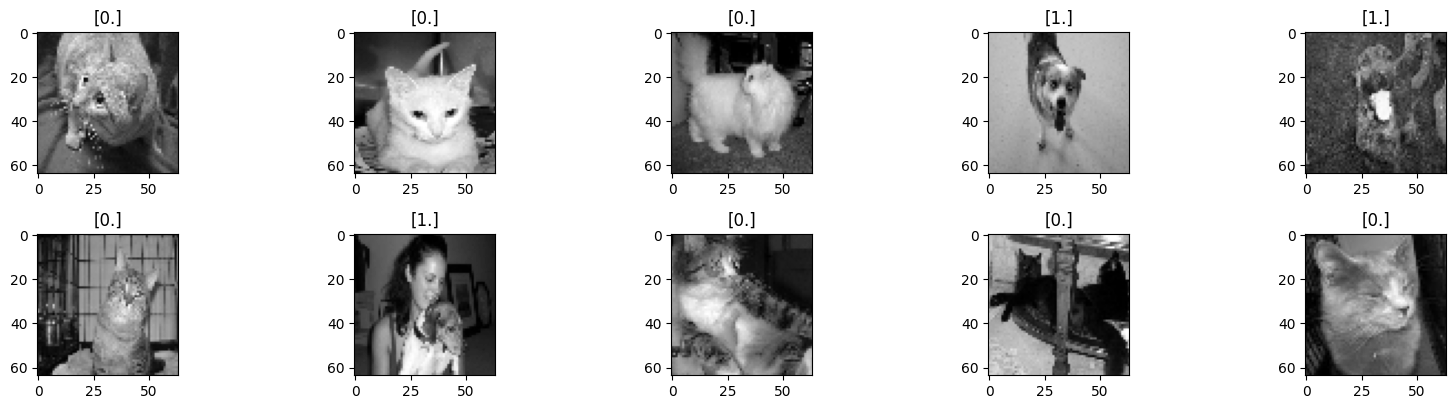

In [6]:
plt.figure(figsize=(16,8))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_tr[i], cmap='gray')
    plt.title(y_tr[i])
    plt.tight_layout()
plt.show()

- Normalize / Flatten train & test sets

In [7]:
# explicit function to normalize array
def normalize(matrix):
    matrix = matrix/np.max(matrix)  # normalized matrix
    return matrix

In [8]:

X_train_reshape = X_tr.reshape((X_tr.shape[0], X_tr.shape[1] * X_tr.shape[2]))
X_test_reshape = X_tst.reshape((X_tst.shape[0], X_tst.shape[1] * X_tst.shape[2]))
X_train_reshape_norm = X_train_reshape / np.max(X_train_reshape)
X_test_reshape_norm =  X_test_reshape / np.max(X_train_reshape)

In [9]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))

    '''
    print('A before reshape {}'.format(A.shape))
    A = A.reshape((A.shape[0], A.shape[1]))
    print('A after reshape {}'.format(A.shape))
    '''
    return A

def log_loss(A, y):
    epsilon = 1e-15
    LogLoss = -1 / len(y) * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    return LogLoss

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.01, n_iter = 10000):
    W, b = initialization(X_train)
    Loss_train = []
    Accuracy_train = []
    Loss_test = []
    Accuracy_test = []
    for i in tqdm(range(n_iter)):
        # Train
        A = model(X_train, W, b)
        Loss_train.append(log_loss(A, y_train))
        y_pred = predict(X_train, W, b)
        Accuracy_train.append(accuracy_score(y_train, y_pred))

        # Test
        A_test = model(X_test, W, b)
        Loss_test.append(log_loss(A_test, y_test))
        y_pred = predict(X_test, W, b)
        Accuracy_test.append(accuracy_score(y_test, y_pred))

        # Update
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    # Plot Loss function
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    plt.plot(Loss_train, label='Train loss')
    plt.plot(Loss_test, label='Test loss')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.plot(Accuracy_train, label='Train Accuracy')
    plt.plot(Accuracy_test, label='Test Accuracy')
    plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()

    #print(np.min(Loss_train), np.min(Loss_test))
    #print(np.max(Accuracy_train), np.max(Accuracy_test))

    # Accuracy rate
    #y_pred = predict(X, W, b)
    #print('\033[1m' +'\033[92m' + '\033[4m' +'Outcome 1: The errors are decreasing with the iterations. We can say the model is LEARNING!\n')
    #print('\033[1m' +'\033[92m' + '\033[4m' + 'Outcome 2: The prediction of the model on the training data is {}% successful'.format(accuracy_score(y, y_pred)*100))

    return (W, b)

100%|██████████| 10000/10000 [01:11<00:00, 139.59it/s]


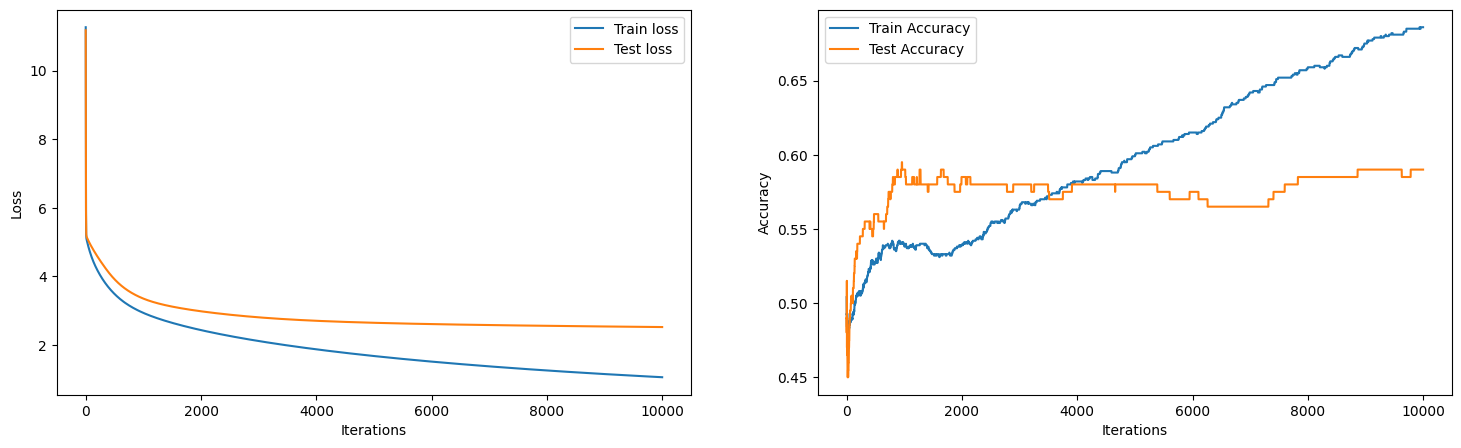

In [10]:
W, b = artificial_neuron(X_train_reshape_norm, y_tr, X_test_reshape_norm, y_tst)

 - The model is overfitting because of 2 main raisons:
    

1- 1000 pictures are not enough to train a deep learning model<br>
2- As 1 artificial neuron is linear model, it can only be used on problems that can be separated linearly. Then this a mono-neuron model is not enough for our use case. The model needs to be enhaced by adding more neurons (neuron network).

C:\Users\Imtech\AppData\Local\Temp\ipykernel_26948\3661115854.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 5, cnt)


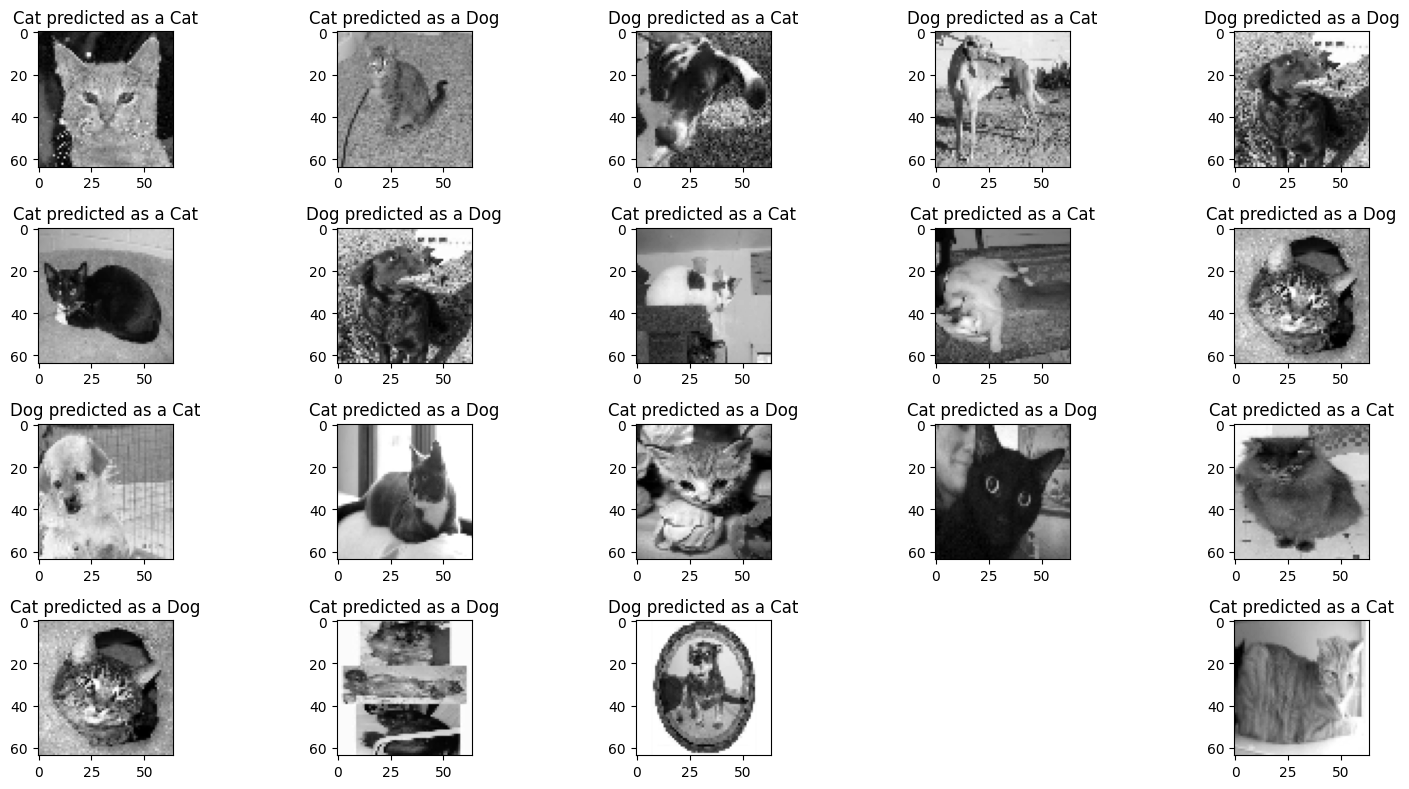

In [11]:
plt.figure(figsize=(16,8))
cnt = 1
for i in np.random.randint(0,200,20):
    pet = ''
    predicted_pet = ''
    plt.subplot(4, 5, cnt)
    plt.imshow(X_tst[i], cmap='gray')
    if y_tst[i][0] == 1:
        pet = 'Dog'
    elif y_tst[i][0] == 0:
        pet = 'Cat'
    
    if predict(X_test_reshape_norm[i], W, b)[0] == True:
        predicted_pet = 'Dog'
    elif predict(X_test_reshape_norm[i], W, b)[0] == False:
        predicted_pet = 'Cat'
    plt.title(pet + ' predicted as a '+ predicted_pet)
    plt.tight_layout()
    cnt = cnt + 1
plt.show()